<a href="https://colab.research.google.com/github/lha2326/File/blob/main/Flight_Price_Prediction_(D%E1%BB%B1_%C4%91o%C3%A1n_gi%C3%A1_v%C3%A9_m%C3%A1y_bay).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Khảo sát và tiền xử lý dữ liệu

## **1. Giới thiệu**


Bộ dữ liệu **"Flight Price Prediction"** được lấy từ [Kaggle](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?resource=download)
. Dữ liệu gồm 300,153 dòng tương ứng với mỗi lượt đặt vé. Trong đó, có 1 cột STT và 11 biến thông tin về vé máy bay.

1.   Hãng hàng không (airline)
2.   Mã chuyến bay (flight)
3.   Thành phố khởi hành (source city)
4.   Thời gian khởi hành (departure time)
5.   Số lượt trung chuyển (stops)
6.   Thời gian đến (arrival time)
7.   Thành phố đến (destination city)
8.   Hạng vé (class): Hạng thường - Economy và hạng thương gia - Business
9.   Thời gian bay (duration)
10.  Số ngày còn lại (days left): Ngày đặt vé - Ngày khởi hành của chuyến bay
11.  Giá vé (price).


## **2. Khảo sát dữ liệu**


Bên dưới ta sẽ kiểm tra số trường và kích thước mẫu

### Import thư viện


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

### Tổng quan dữ liệu

In [ ]:
# Import Data
link = 'https://raw.githubusercontent.com/Pegah-Ardehkhani/Flight-Price-EDA-and-Prediction/main/data/Clean_Dataset.csv'
df = pd.read_csv(link,encoding= 'unicode_escape')

In [ ]:
# Đọc 5 dòng đầu tiên
print('Data shape: ', df.shape)
df.head()

Data shape:  (300153, 12)


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# Thông tin về dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
# Kiểm tra dạng dữ liệu
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
Unnamed: 0,int64
days_left,int64
price,int64
duration,float64
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object


In [ ]:
table_dtype['Data Type'].value_counts()

object     8
int64      3
float64    1
Name: Data Type, dtype: int64

In [ ]:
# Kiểm tra dữ liệu null
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
# Thống kê số lượng các class trong mỗi nhóm đối với dữ liệu dạng object.
df.select_dtypes('object').apply(pd.Series.nunique)

airline                6
flight              1561
source_city            6
departure_time         6
stops                  3
arrival_time           6
destination_city       6
class                  2
dtype: int64

### Biểu đồ phân phối

Vẽ biểu đồ phân phối số lượng các quan sát theo nhóm đối với dữ liệu dạng object. Đối với các biến **flight** ta sẽ nghiên cứu riêng do số lượng class lớn.

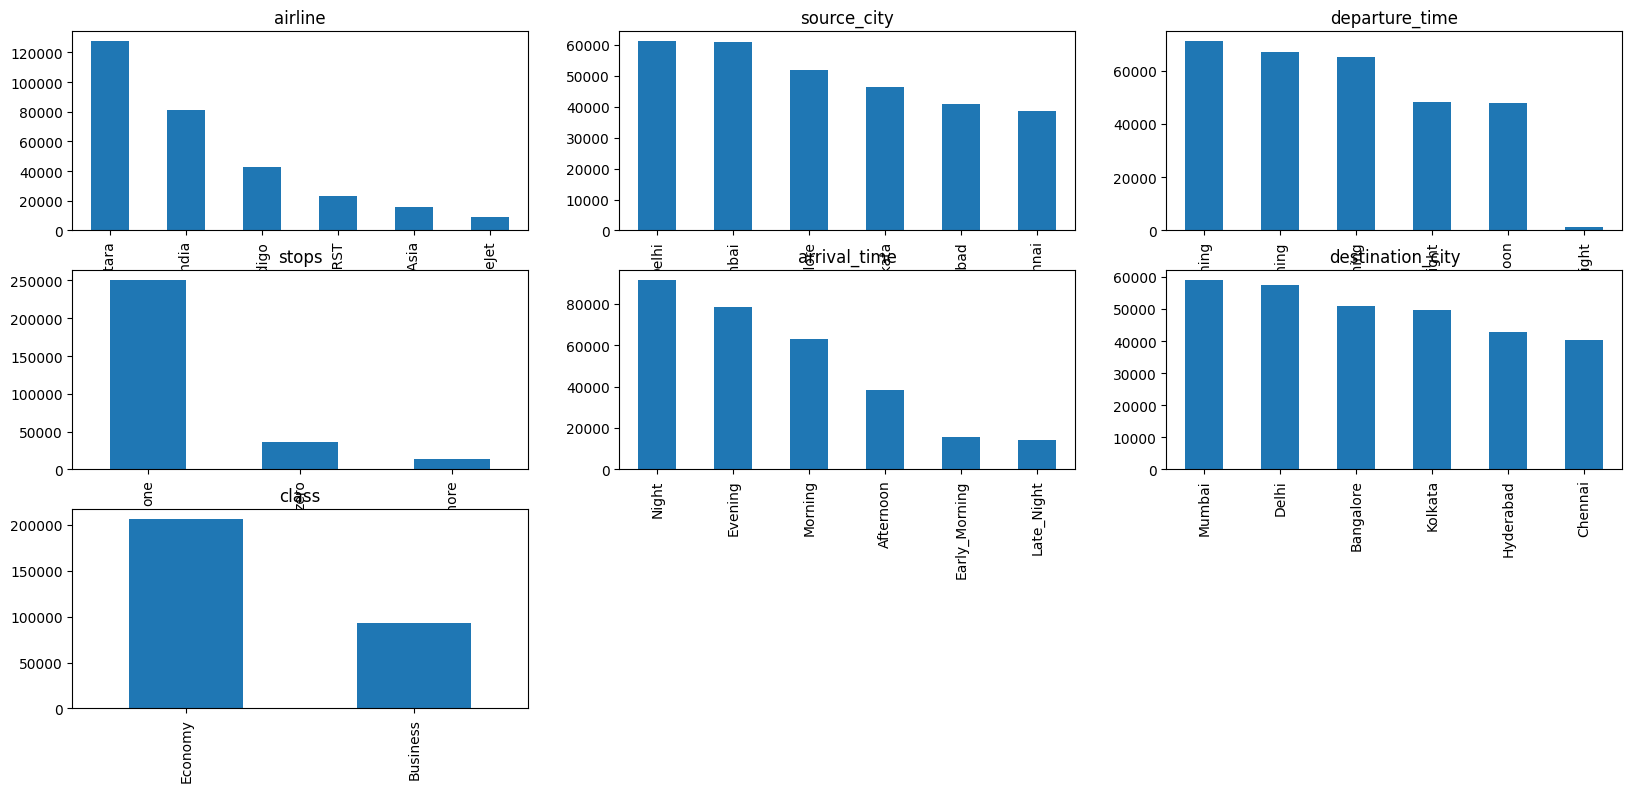

In [ ]:
# Biểu đồ phân phối
dtypes_object = table_dtype[table_dtype['Data Type'] == 'object'].index.tolist()
dtypes_object = [col for col in dtypes_object if col not in ['flight']]


def _plot_bar_classes(cols):
    df[cols].value_counts().plot.bar()

plt.figure(figsize = (20, 15))
for i in range(1, 8, 1):
    plt.subplot(5, 3, i)
    _plot_bar_classes(dtypes_object[i-1])
    plt.title(dtypes_object[i-1])

Kiểm tra riêng biến flight

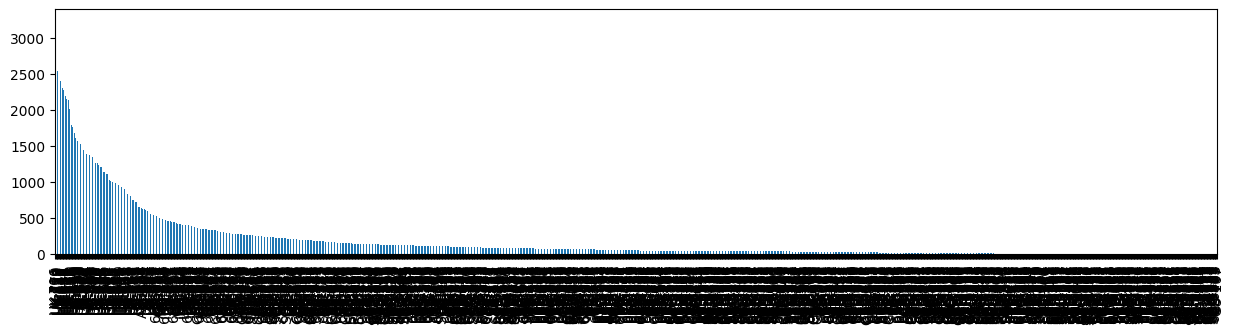

In [ ]:
plt.figure(figsize = (15, 7))
i = 0
for col in ['flight']:
    i += 1
    plt.subplot(2, 1, i)
    _plot_bar_classes(col)

Thông qua biểu đồ ta cũng hình dung được một vài biến phân loại có sự khác biệt lớn về giá như airline, stops, class. Do vậy, đây là những biến có tác động lớn đến biến mục tiêu.

In [ ]:
df.groupby('airline').size()

airline
AirAsia       16098
Air_India     80892
GO_FIRST      23173
Indigo        43120
SpiceJet       9011
Vistara      127859
dtype: int64

In [ ]:
df.groupby('flight').size()

flight
6E-102      39
6E-105       5
6E-113      49
6E-121      20
6E-123       5
          ... 
UK-988    1381
UK-993     911
UK-994    1273
UK-995    1024
UK-996    1266
Length: 1561, dtype: int64

In [ ]:
df.groupby('source_city').size()

source_city
Bangalore    52061
Chennai      38700
Delhi        61343
Hyderabad    40806
Kolkata      46347
Mumbai       60896
dtype: int64

In [ ]:
df.groupby('departure_time').size()

departure_time
Afternoon        47794
Early_Morning    66790
Evening          65102
Late_Night        1306
Morning          71146
Night            48015
dtype: int64

In [ ]:
df.groupby('stops').size()

stops
one            250863
two_or_more     13286
zero            36004
dtype: int64

In [ ]:
df.groupby('arrival_time').size()

arrival_time
Afternoon        38139
Early_Morning    15417
Evening          78323
Late_Night       14001
Morning          62735
Night            91538
dtype: int64

In [ ]:
df.groupby('destination_city').size()

destination_city
Bangalore    51068
Chennai      40368
Delhi        57360
Hyderabad    42726
Kolkata      49534
Mumbai       59097
dtype: int64

In [ ]:
df.groupby('class').size()

class
Business     93487
Economy     206666
dtype: int64

In [ ]:
df.groupby('duration').size()

duration
0.83      52
0.92      78
1.00     377
1.08     553
1.17     960
        ... 
44.50      1
45.83      3
47.08      1
47.75      2
49.83      2
Length: 476, dtype: int64

In [ ]:
df.groupby('days_left').size()

days_left
1     1927
2     4026
3     4248
4     5077
5     5392
6     5740
7     5703
8     5767
9     5665
10    5822
11    6417
12    6381
13    6404
14    6349
15    6340
16    6272
17    6419
18    6602
19    6537
20    6502
21    6479
22    6494
23    6401
24    6542
25    6633
26    6573
27    6360
28    6522
29    6397
30    6501
31    6534
32    6585
33    6532
34    6412
35    6291
36    6490
37    6476
38    6512
39    6593
40    6531
41    6525
42    6497
43    6472
44    6436
45    6314
46    6160
47    6069
48    6078
49    6154
dtype: int64

In [ ]:
df.groupby('price').size()

price
1105      300
1106        7
1443      180
1444       14
1526       20
         ... 
114705      1
115211      1
116562      1
117307      1
123071      1
Length: 12157, dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


### Nhận xét

Dữ liệu có tất cả 12 cột trong đó:
* **Unnamed: 0**: Cột thứ tự
* **airline**: Tên của các hãng hàng không. Đây là cột gồm các biến category với 6 hãng hàng không khác nhau.
* **flight**: Các mã chuyến bay. Đây là biến category.
* **source_city**: Các thành phố xuất phát. Đây là cột gồm các biến category với 6 thành phố khác nhau.
* **departure_time**: Thời gian khởi hành chuyến bay, được chia thành 6 khung giờ riêng biệt.
* **stops**: Số lượng điểm dừng ở mỗi chuyến bay. Đây là cột gồm các biến category.
* **arrival_time**: Thời gian chuyến bay hạ cánh, được chia thành 6 khung giờ riêng biệt.
* **destination_city**: Các thành phố đáp chuyến bay. Đây là cột gồm các biến category với 6 thành phố khác nhau.
* **class**: Hạng ghế, với hai giá trị "thường (Economy)" và "thương gia" (Business).
* **duration**: Thời lượng của chuyến bay. Đây là biến liên tục, với giá trị nhỏ nhất bằng 0.83 giờ và giấ trị lớn nhất là 49.83 giờ.
* **days_left**: Số ngày từ khi đặt vé tới lúc khởi hành chuyến bay, với giá trị nhỏ nhất là 1 ngày và giá trị lớn nhất là 49 ngày.
* **price**: Giá vé, với giá trị nhỏ nhất là 1,105 và giá trị lớn nhất là 123,071.

## **3. Tiền xử lý dữ liệu**

### Loại bỏ những biến không có ý nghĩa trong mô hình

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df1 = df.copy()

In [ ]:
# Loại bỏ cột flight, Unnamed do không có ý nghĩa thống kê
df1 = df1.drop(['flight','Unnamed: 0'], axis = 1)

In [ ]:
# Chuyển đổi các nhãn trong một DataFrame thành dạng số
le=LabelEncoder()
for col in df1.columns:
    if df1[col].dtype=='object':
        df1[col]=le.fit_transform(df1[col])

In [ ]:
# Lưu trữ tên cột và chỉ số dòng của DataFrame gốc
names = df1.columns
indexes = df1.index

# Áp dụng MinMaxScaler cho các biến đầu vào (không bao gồm biến mục tiêu)
scaler = MinMaxScaler(feature_range=(0, 1))
df1_scaled = scaler.fit_transform(df1.iloc[:, :-1])  # Chỉ lấy các cột trừ biến mục tiêu

# Tạo DataFrame mới từ dữ liệu đã được scaler và sử dụng lại tên cột và chỉ số dòng
data_scaled = pd.DataFrame(df1_scaled, columns=names[:-1], index=indexes)

# Ghép cột biến mục tiêu vào DataFrame đã được scaler
data_scaled[df1.columns[-1]] = df1.iloc[:, -1]

data_scaled.head()


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.8,0.4,0.4,1.0,1.0,1.0,1.0,0.027347,0.0,5953
1,0.8,0.4,0.2,1.0,0.8,1.0,1.0,0.030612,0.0,5953
2,0.0,0.4,0.2,1.0,0.2,1.0,1.0,0.027347,0.0,5956
3,1.0,0.4,0.8,1.0,0.0,1.0,1.0,0.028980,0.0,5955
4,1.0,0.4,0.8,1.0,0.8,1.0,1.0,0.030612,0.0,5955


### Đánh giá mức độ tương quan


Mức độ tương quan của các biến sẽ được xếp hạng một cách tương đối dựa trên giá trị tuyệt đối của chúng. Các khoảng đánh giá như sau:

*   0-0.19: Rất yếu.
*   0.2-0.39: Yếu.
*   0.4-0.59: Trung bình.
*   0.6-0.79: Cao.
*   0.8-1: Rất cao.


Dựa trên bảng hệ số tương quan chúng ta có thể tìm ra những biến có mối liên hệ lớn tới biến giá vé máy bay


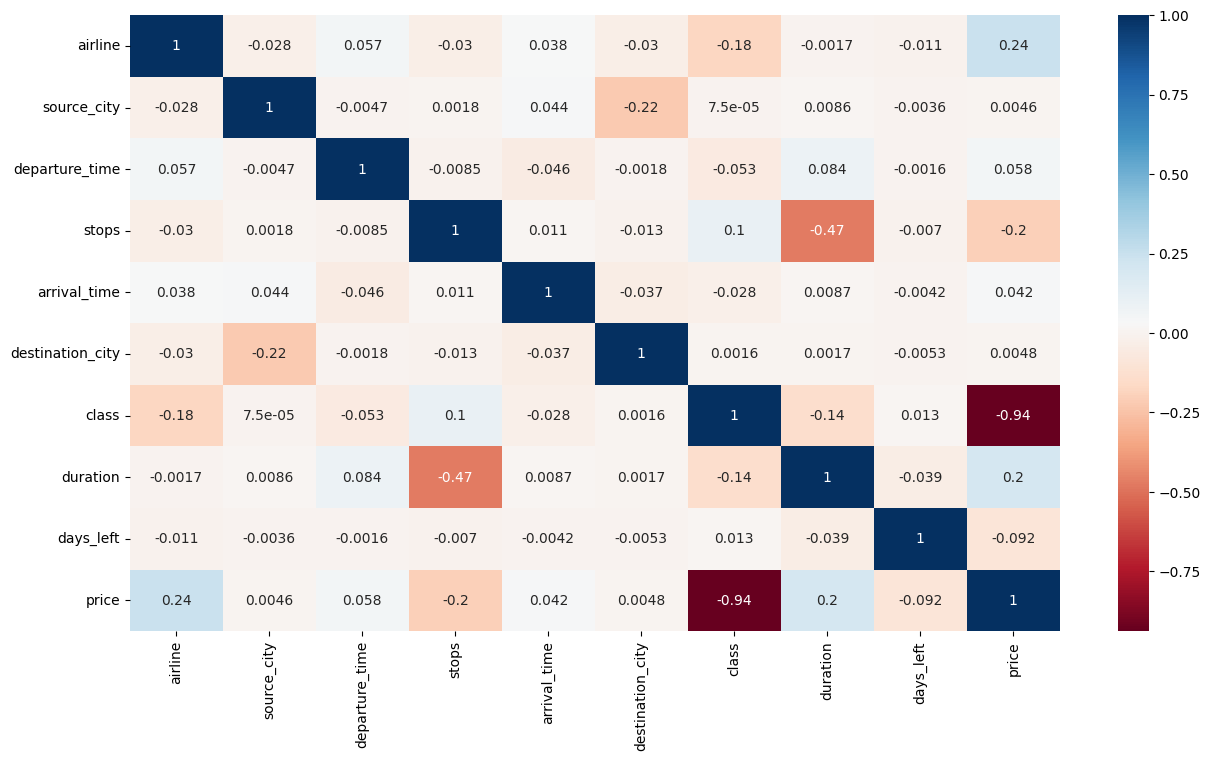

In [ ]:
# Đánh giá mức độ tương quan
plt.figure(figsize=(15,8))
cor = data_scaled.corr()
sns.heatmap(cor, annot=True, cmap='RdBu')
plt.show()

In [ ]:
# Tương quan với giá biến mục tiêu
cor_target = abs(cor["price"])
relevant_features = cor_target
relevant_features = relevant_features.sort_values(ascending=False)
relevant_features

price               1.000000
class               0.937860
airline             0.243358
duration            0.204222
stops               0.202620
days_left           0.091949
departure_time      0.058319
arrival_time        0.042043
destination_city    0.004795
source_city         0.004594
Name: price, dtype: float64

Như vậy, theo hệ số tương quan Pearson, những feature có ảnh hưởng tới giá tiền (price) là class, airline, duration và stops.

### Sử dụng KBest Features

In [ ]:
# Đặt 'price' làm biến mục tiêu
y = data_scaled['price']

# Các biến đầu vào
X_data = data_scaled.drop(['price'], axis=1)
selector = SelectKBest(f_classif, k=5)
X_important = selector.fit_transform(X_data, y)

# Chỉ số Index
index = selector.get_support()

# Tạo danh sách các biến
important_feature_names = X_data.columns[index]

print(important_feature_names)

Index(['airline', 'source_city', 'stops', 'destination_city', 'class'], dtype='object')


Sử dụng kBest Features, những feature có ảnh hưởng tới giá tiền (price) là airline, source_city, stops, destination_city và class.

In [ ]:
features = data_scaled.iloc[:, 0:9]
features

# features = data_scaled[['airline', 'source_city', 'stops', 'destination_city', 'class', 'duration', 'departure_time', 'arrival_time', 'days_left']]
# features

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0.8,0.4,0.4,1.0,1.0,1.0,1.0,0.027347,0.0
1,0.8,0.4,0.2,1.0,0.8,1.0,1.0,0.030612,0.0
2,0.0,0.4,0.2,1.0,0.2,1.0,1.0,0.027347,0.0
3,1.0,0.4,0.8,1.0,0.0,1.0,1.0,0.028980,0.0
4,1.0,0.4,0.8,1.0,0.8,1.0,1.0,0.030612,0.0
...,...,...,...,...,...,...,...,...,...
300148,1.0,0.2,0.8,0.0,0.4,0.6,0.0,0.188776,1.0
300149,1.0,0.2,0.0,0.0,1.0,0.6,0.0,0.195714,1.0
300150,1.0,0.2,0.2,0.0,1.0,0.6,0.0,0.265306,1.0
300151,1.0,0.2,0.2,0.0,0.4,0.6,0.0,0.187143,1.0


### Chia tập train và test

In [ ]:
# Chuyển đổi features thành mảng NumPy
X = np.array(features)
X

array([[0.8       , 0.4       , 0.4       , ..., 1.        , 0.02734694,
        0.        ],
       [0.8       , 0.4       , 0.2       , ..., 1.        , 0.03061224,
        0.        ],
       [0.        , 0.4       , 0.2       , ..., 1.        , 0.02734694,
        0.        ],
       ...,
       [1.        , 0.2       , 0.2       , ..., 0.        , 0.26530612,
        1.        ],
       [1.        , 0.2       , 0.2       , ..., 0.        , 0.18714286,
        1.        ],
       [1.        , 0.2       , 0.8       , ..., 0.        , 0.18877551,
        1.        ]])

In [ ]:
# Chuyển đổi biến mục tiêu thành mảng NumPy
y = np.array(data_scaled['price'])
y

array([ 5953,  5953,  5956, ..., 79099, 81585, 81585])

In [ ]:
# Chia tập train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((225114, 9), (75039, 9), (225114,), (75039,))

# **II. Lập trình thử nghiệm thuật toán tối ưu hóa**

Các nhóm cần tự lập trình các thuật toán giảm gradient, accelerated gradient descent và Newton cho bài toán với độ dài bước cố định và độ dài bước theo backtracking.
Cần thử nghiệm với nhiều con số khác nhau.
Cần vẽ biểu đồ so sánh kết quả của các thử nghiệm này và đưa ra kết luận về setup nên lựa chọn tương tự như ở đây https://www.researchgate.net/figure/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron_fig1_352322277. Trong đó trục tung là độ lớn hàm mục tiêu còn trục hoành là iterations và thời gian (vẽ 2 hình khác nhau).

Đồng thời học viên cần so sánh về kết quả hàm mục tiêu và thời gian tính toán của code của mình với chế độ mặc định khi sử dụng thư viện sklearn (lưu ý là cần so sánh hàm mục tiêu của bài toán tối ưu hóa chứ không phải độ chính xác, các nhóm vẫn có thể so sánh thêm độ chính xác nếu muốn).

**Outline**

Hàm tuyến tính với biến phản hồi là giá vé máy bay có dạng như sau:

$$f(x_1,x_2,...,x_9) =  x_1.m_1 + x_2.m_2 +...+ x_9.m_9 + b $$


> Với
*  $x_i$ lần lượt là các biến phụ thuộc *(airline,	source_city,	departure_time,	stops,	arrival_time,	destination_city,	class,	duration, days_left)*
*  $m_i$ là hệ số góc
*  $b$ là hệ số chặn



Để đơn giản hóa, chúng ta sẽ biểu diễn hàm trên dưới dạng vector như sau:
$$f(X_b) = X_b.\theta$$
> Với:
$$\theta  =
  \left[
    \begin{array}{0}
      {\theta _0}\\
      {\theta _1}\\
      \vdots \\
      {\theta _{9}}
    \end{array}
  \right]
  =
  \left[
    \begin{array}{1}
      {b}\\
      {m_1}\\
      \vdots \\
      {m_9}
    \end{array}
  \right]
  $$
$$X_b =
  \left[
    \begin{array}{1}
      {1}\\
      {x_1}\\
      \vdots \\
      {x_9}
    \end{array}
  \right]^T
  $$

In [ ]:
# def add_intercept_ones(X):
#     intercept_ones = np.ones((len(X),1)) # array( [ [1],..,[1] ] )
#     X_b = np.c_[intercept_ones,X] # Nối ma trận
#     return X_b

**1. Hàm tối ưu**
1. Gradient Descent
2. Accelerated Gradient Descent
3. Newton

**2. Đưa ra giá trị dự đoán**

Ta phải tính các giá trị dự đoán của mô hình $f(X_b)$ với đầu vào là $X_b$ và $θ$ (hệ số của mô hình).

In [ ]:
# def create_function(theta):
#     def f(X_b):
#       return np.dot(X_b.T, theta)

#     return f


**3. Hàm mất mát (MSE)**

Công thức MSE:

$$MSE(m,b) = \frac{1}{n}((y-y_{predicted})^T.(y-y_{predicted}))$$

Với:

*  $m$ là hệ số góc
*  $b$ là hệ số chặn
*  $y$ là vector chứa các giá trị thực tế.
*  $y_{predicted}$ là vector chứa các giá trị dự đoán tương ứng với y.
*  $n$ là số lượng mẫu của dữ liệu.

In [ ]:
# # Hàm MSE
# def mse(y, y_predicted):
#     n = y.size
#     error = y-y_predicted
#     loss = 1/n * np.dot(error.T, error)
#     return loss

**4. Tối ưu hóa**


Tính gradient của hàm mất mát MSE

> Đạo hàm riêng theo m (hệ số góc):



$$\frac{\partial{MSE}}{\partial{m}} = (\frac{-2}{n}) . \sum_{i=1}^{n}((y_i - y_{predicted}) * x_i)$$

> Đạo hàm riêng theo b (hệ số chặn):

$$\frac{\partial{MSE}}{\partial{b}} = (\frac{-2}{n}) . \sum_{i=1}^{n}((y_i - y_{predicted})))$$

In [ ]:
# # Gradient của hàm MSE
# def mse_derivative_m(X,y,y_predicted):
#     return -(2/y.size) * sum(X * (y - y_predicted))

# def mse_derivative_b(y,y_predicted):
#     return -(2/y.size) * sum(y - y_predicted)

## **1. Gradient Descent**##

In [ ]:
# Giá trị dự đoán
def f(m,x,b):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(m @ x[i] + b)
    return np.array(y_lst)

In [ ]:
# Hàm mất mát MSE
def MSE(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

In [ ]:
# Gradient của hàm MSE
def mse_derivative_m(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s

def mse_derivative_b(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n)*s

In [ ]:
# Hàm gradient_descent với độ dài bước cố định
def gradient_descent_fixed_step(x, y, number_of_iterations, learning_rate):
    m=np.random.randn(x.shape[1])
    b=0
    n = len(x)
    loss_hist=[]

    for i in range(number_of_iterations):
        # Dự báo và MSE
        y_predicted = f(m,x,b)
        loss_hist.append(mse(y,y_predicted))

        # Tối ưu hóa
        m = m - learning_rate * mse_derivative_m(x,y,y_predicted)
        b = b - learning_rate * mse_derivative_b(y,y_predicted)


    plt.plot(np.arange(1,number_of_iterations),loss_hist[1:])
    plt.xlabel("number of iterations")
    plt.ylabel("traing cost")

    return m,b, mse

In [ ]:
# Kiểm thử Hàm
number_of_iterations = 50
learning_rate = 10e-3
gradient_descent_fixed_step(X_train, y_train, number_of_iterations, learning_rate)

NameError: ignored

In [ ]:
# def gradient_descent(X, y, theta, mse, number_of_iterations, learning_rate):
#     X_b = add_intercept_ones(X)
#     for i in range(number_of_iterations):

#         # Dự báo và tính MSE
#         f = create_function(theta) # Tạo hàm tính hiện tại
#         y_predicted = f(X_b) # Dự báo X
#         loss = mse(y_train,y_predicted) # Tính MSE

#         # Tối ưu hóa
#         gradient = np.array([mse_derivative_b(y,y_predicted), mse_derivative_m(X,y,y_predicted)]) # Tính gradient MSE
#         theta = theta - learning_rate * gradient # Điều chỉnh m và b

#     return theta

In [ ]:
# theta = np.zeros(10)
# number_of_iterations = 25
# learning_rate = 0.001
# optimize_theta = gradient_descent(X_train, y_train, theta, mse, number_of_iterations, learning_rate)

In [ ]:
#Function For EarlyStopping
def EarlyStopping(loss):
    for i in range(1, len(loss)):
        yield (loss[i-1], loss[i])

#Creation of Batches
def batch_size(batchsize, X):
    batches = round(X.shape[0]//batchsize)
    return batches

#Gradient Descent Function
def regression_gradient_descent(X_train, y_train, m, b):
    yhat = np.dot(X_train,m) + b                                      #Predictions
    MSE = (np.sum((y_train-yhat)**2))/N                               #Error
    r_squared = r2_score(y_train,yhat)
    loss_slope_b = -(2/N)*sum(y_train-yhat)                           #wrt to b aka intercept
    loss_slope_m = -(2/N)*(np.dot((y_train - yhat),X_train))          #wrt to the slope of the line
    m = m - (learning_rate*loss_slope_m)
    b = b - (learning_rate*loss_slope_b)
    return m, b, MSE, r_squared

In [ ]:
from sklearn.metrics import r2_score
np.random.seed(0)
N = X.shape[0]
learning_rate=0.2
decay_rate =  0.01
LR = []
ValidationLoss = []
Trainingloss = []
batchsize = 30
Intercept = []
Slope = []
m=np.ones(X.shape[1])                  #initializing some values of slope
b=1                                     #initializing some values of intercept
print('The initial Value of w and b are', m, b)
batches = batch_size(batchsize, X)
for i in range(2000):
    epoch = i
    for j in range(batches):
        if i==0:

            #Updating the params at certain intervals in an epoch
            if j % batchsize==0:
                learning_rate = learning_rate
                np.random.seed(0)
                np.random.shuffle([X_train, y_train])
                m, b, MSE, r_squared = regression_gradient_descent(X_train, y_train, m, b)
                m_test, b_test, MSE_test, r_squared_test = regression_gradient_descent(X_test, y_test, m, b)
            else:
                m = m
                b = b

        else:

            #Updating the params at certain intervals in an epoch
            if j % batchsize==0:
                learning_rate = [(1/(1+decay_rate))* learning_rate for j in range(batches)][0]
                np.random.seed(0)
                np.random.shuffle([X_train, y_train])
                m, b, MSE, r_squared = regression_gradient_descent(X_train, y_train, m, b)
                m_test, b_test, MSE_test, r_squared_test = regression_gradient_descent(X_test, y_test, m, b)
            else:
                m = m
                b = b

    Intercept.append(b)
    Slope.append(m)
    Trainingloss.append(MSE)
    ValidationLoss.append(MSE_test)
    LR.append(learning_rate)

    if i % 20 == 0:
        print('===> Epoch: ',i,' Loss: ',"{:.2e}".format(MSE), ' Val Loss: ',"{:.2e}".format(MSE_test),
              ' R-Squared:', round(r_squared,4), ' Val R-Squared: ', round(r_squared_test,4))

    #Early Stopping Mechanism
    for prev, curr  in EarlyStopping(ValidationLoss):
        if prev - curr<1e-6:
            print('-- Early Stopping at Epoch',i,'with Val Loss', np.around(MSE_test,5),
                  'and Val R-Squared', np.around(r_squared_test,5), '--')
            break                  #Inner Loop Break
    else:
        continue                   # executed if the inner loop did NOT break
    break                          # executed if the inner loop DID break
print('The final estimates of w and b are',m, b)

In [ ]:
coefficient  = (Slope[epoch])
intercept = (Intercept[epoch])
y_pred = np.dot(X_test, coefficient)+intercept      #Predictions
df = pd.DataFrame(y_pred, y_test, columns=['y']).reset_index().rename(columns = {'index':'y','y':'y_pred'})

#Plotting the Figures
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22,5))
fig.subplots_adjust(hspace = .2, wspace=.3)

#First Plot
ax1.plot(Trainingloss, linestyle='--')
ax1.set_title("Training Loss Plot, Regression")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss')

#second plot
ax2.plot(ValidationLoss, 'tab:orange', linestyle='dashed', markersize=5)
ax2.set_title("Validation Loss Plot, Regression")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Validation Loss')

#third Plot
ax3 = sns.regplot(data=df, x=df['y'],y=df['y_pred'], color='lightgray', fit_reg=True)
ax3.lines[0].set_color('red')
ax3.set_title('Targets vs Prediction, Regression')
ax3.set_xlabel('Targets')
ax3.set_ylabel('Prediction')

plt.show()

## **2. Accelerated Gradient Descent**


## **3. Newton**

In [ ]:
#Newton Raphson Function
def regression_newton_raphson(X_train, y_train, m, b):
    yhat = np.dot(X_train, m) + b
    MSE = (np.sum((y_train - yhat)**2)) / N
    r_squared = r2_score(y_train, yhat)
    grad = np.array([-2 * np.sum(y_train - yhat), -2 * np.dot(y_train - yhat, X_train)])
    H = np.array([[2 * N, 2 * np.sum(X_train)], [2 * np.sum(X_train), 2 * np.dot(X_train.T, X_train)]])
    theta_prev = np.array([b, m])

    for i in range(max_iter):
        H_inv = np.linalg.inv(H)
        theta = theta_prev - np.dot(H_inv, grad)
        y_pred = np.dot(X_train, theta[1]) + theta[0]
        MSE_new = (np.sum((y_train - y_pred)**2)) / N

        if np.abs(MSE_new - MSE) < tol:
            break

        MSE = MSE_new
        grad = np.array([-2 * np.sum(y_train - y_pred), -2 * np.dot(y_train - y_pred, X_train)])
        H = np.array([[2 * N, 2 * np.sum(X_train)], [2 * np.sum(X_train), 2 * np.dot(X_train.T, X_train)]])
        theta_prev = theta

    b_new, m_new = theta[0], theta[1]
    r_squared_new = r2_score(y_train, y_pred)

    return m_new, b_new, MSE, r_squared_new

In [ ]:
print('The final estimates of w and b are',m_new, b_new)

## **4. So sánh**

# **III. Kết luận**